# Understanding the Minecart Environment

We want to understand how reinforcement learning agents interact with their environment.  To do that, let's see if we can write an agent that plays the minecart environment using traditional code instead of reinforcement learning.

Note that these reinforcement learning environments are not really designed to be done the way I'm doing here.  The agent is supposed to learn how to do the environment on its own.  Programming these manually like I'm doing here defeats the whole purpose of self-learning agents.  What I'm doing here is more of an exploration to help us understand the mechanics of how these agents interact with and perceive their world.

In [3]:
import gym
env = gym.make('MountainCarContinuous-v0')
env.reset()
env.render()

True

This shows us an environment that looks like this:
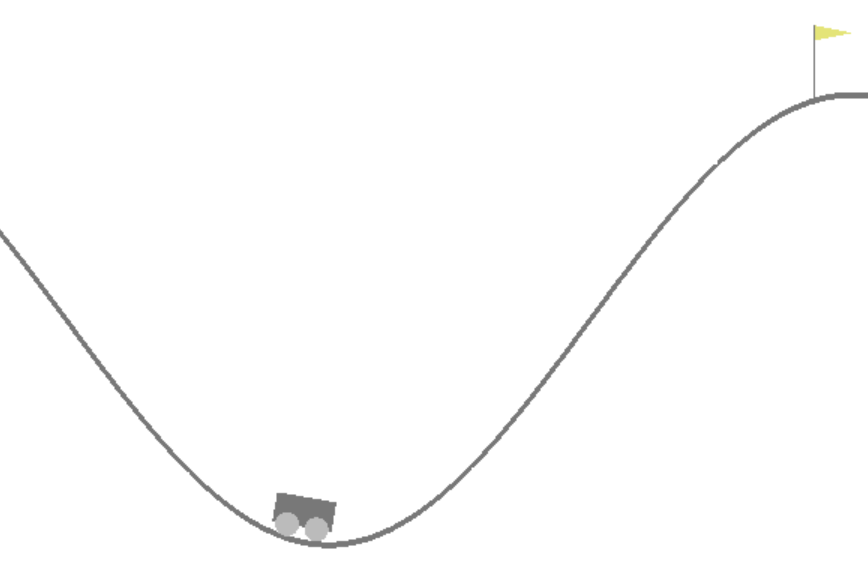

# Action Space
Let's take a look at the possible actions we can perform in this environment.

In [4]:
env.action_space

Box(1,)

This means our action is an array with one item in it. Or, a single number.

In [5]:
env.action_space.low

array([-1.], dtype=float32)

In [15]:
env.action_space.high

array([1.], dtype=float32)

In [16]:
env.close()

So our possible actions are always a single number between -1 and +1.  I'm guessing that is interpreted as a variable amount of thrust ranging from full-blast to the left to full-blast to the right.

Let's test that hypothesis by making an agent that always does an action of -1.

In [18]:
import gym
env = gym.make('MountainCarContinuous-v0')
observation = env.reset()
for t in range(500):
        env.render()
        #print(observation)
        action = [1] # The action is always an array.
        observation, reward, done, info = env.step(action)
        #print(observation, reward, done, info)
        if done:
            print("Finished after {} timesteps".format(t+1))
            break
env.close()

We can see the cart thrust to one side.  Try changing the -1 to other numbers and see what it does.

I can see that constant thrusting to a single direction isn't going to work, because eventually gravity takes over and reverses our direction.  I'm going to try for a strategy that thrusts in the same direction we appear to be moving.  That's not very optimal either, but we can improve it later.  To make an algorithm that uses the cart's current velocity we're going to need to inspect the state of the world by looking at our observation.    

# Observation Space

Whenever we perform an action in the environment, we get back an *observation*.  An *observation* is how we sense the state of the world.  We also get back an observation object when we do our initial reset of the environment.

Our next step is to figure out which of the elements in the observation represents the cart's current velocity.  The cart starts off not moving, so we're going to need a little velocity to tell what's going on.

In [23]:
env.observation_space

Box(2,)

Box(2,) means the entire state of the world is expressed as an array of 2 numbers.

In [29]:
print(env.observation_space.low)

[-1.2  -0.07]


In [30]:
print(env.observation_space.high)

[0.6  0.07]


So we've got 2 numbers, one that ranges from -1.2 to 0.6, and another that ranges from -0.07 to +0.07.  I'm guessing the one that goes +/- 0.07 is either speed or position.  Let's see if we can figure that out.  I'm going to take an observation once at the start, then thrust right 3 times and take another observation.


In [32]:
observation = env.reset()
print(observation)

[-0.56787809  0.        ]


Our starting observation is 0 for the second number.  Now let's thrust right 3 times and see what the observations are.

In [46]:
observation = env.reset()
print(observation)
for i in range(3):
    action = [1]
    observation, reward, done, info = env.step(action)
    print(observation)
env.close()

[-0.51956112  0.        ]
[-0.5180914   0.00146972]
[-0.51516299  0.00292841]
[-0.51079783  0.00436515]


What do you think the 2 numbers represent? Velocity, Horizontal position, vertical position, speed, acceleration?  The agent figures these things out through trial and error.

Try changing that action to -1 and notice that the right number moves in the negative direction instead.  Notice that the number keeps getting bigger.  Let's determine if the number represents velocity or distance.  I think it's velocity, because it goes up by about the same amount each time.

Let's go with the assumption that the second number represents acceleration, and thrust right whenever the sign of the second number is positive.

In [49]:
observation = env.reset()
print(observation)
for i in range(300):
    velocity = observation[1]
    if velocity > 0:
        thrust = 1
    else:
        thrust = 0
    action = [thrust]
    observation, reward, done, info = env.step(action)
    env.render()
    #print(observation)
env.close()

[-0.59777613  0.        ]


Hey that solves it!

Next step: change that to exit if it's done.